## To what extent can intelligent document processing systems be integrated with enterprise automation platforms (e.g., Microsoft Syntex, Power Automate) to support decision-making?

  Integrated_with_Automation        Platform  Automation_ROI_Percent  \
0                        Yes  Power Automate                   11.93   
1                         No           Kofax                   42.87   
2                        Yes  Power Automate                   50.38   
3                        Yes          UiPath                   12.65   
4                        Yes      Custom API                   18.01   

   Error_Rate_before  Error_Rate_after  Processing_Time_sec  \
0              0.130             0.027                 5.14   
1              0.209             0.021                 4.92   
2              0.119             0.043                 4.50   
3              0.175             0.012                 4.00   
4              0.190             0.064                 4.25   

   Manual_Processing_Time_sec  error_reduction  time_saving_sec  
0                       14.69            0.103             9.55  
1                       16.22            0.188          

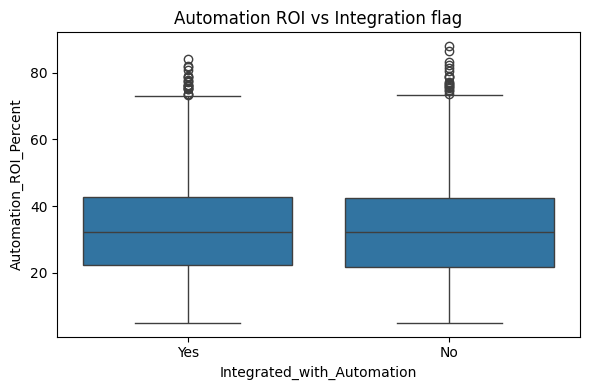

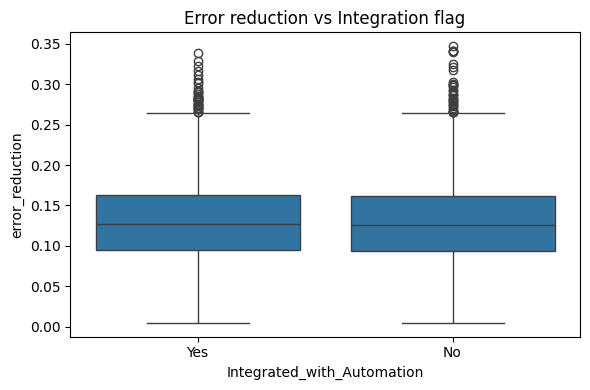

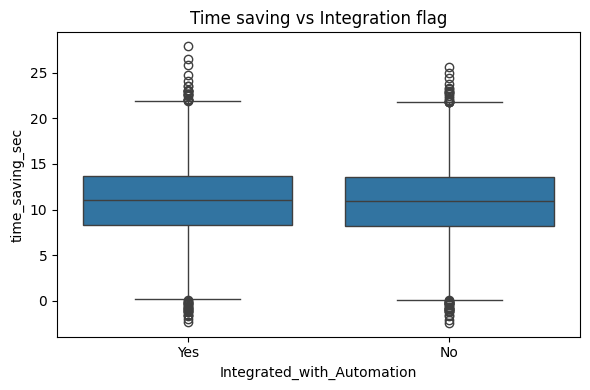

In [ ]:
# Analyze relationships between automation integration and ROI/error/time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

cols = ['Integrated_with_Automation','Platform','Automation_ROI_Percent',
        'Error_Rate_before','Error_Rate_after',
        'Processing_Time_sec','Manual_Processing_Time_sec']
sub = business_cards_df[cols].copy()

sub['Integrated_with_Automation'] = sub['Integrated_with_Automation'].astype(str)
sub['error_reduction'] = sub['Error_Rate_before'] - sub['Error_Rate_after']
sub['time_saving_sec'] = sub['Manual_Processing_Time_sec'] - sub['Processing_Time_sec']

print(sub.head())

plt.figure(figsize=(6,4))
sns.boxplot(data=sub, x='Integrated_with_Automation', y='Automation_ROI_Percent')
plt.title('Automation ROI vs Integration flag')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=sub, x='Integrated_with_Automation', y='error_reduction')
plt.title('Error reduction vs Integration flag')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(data=sub, x='Integrated_with_Automation', y='time_saving_sec')
plt.title('Time saving vs Integration flag')
plt.tight_layout()
plt.show()

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import os

# Define the output directory and filename
output_dir = '/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis'
output_filename = 'Q2_00_Business_Card_Dataset_Analysis.pdf'
output_path = os.path.join(output_dir, output_filename)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

print(f"Saving plots to: {output_path}")

# Create a PDF object
with PdfPages(output_path) as pdf:
    # Plot 1: Automation ROI vs Integration flag
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=sub, x='Integrated_with_Automation', y='Automation_ROI_Percent')
    plt.title('Automation ROI vs Integration flag')
    plt.xlabel('Integrated with Automation')
    plt.ylabel('Automation ROI (%)')
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.close() # Close the figure to free up memory

    # Plot 2: Error reduction vs Integration flag
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=sub, x='Integrated_with_Automation', y='error_reduction')
    plt.title('Error reduction vs Integration flag')
    plt.xlabel('Integrated with Automation')
    plt.ylabel('Error Reduction (before - after)')
    plt.tight_layout()
    pdf.savefig() # Save the current figure to the PDF
    plt.close() # Close the figure to free up memory

    # Plot 3: Time saving vs Integration flag
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=sub, x='Integrated_with_Automation', y='time_saving_sec')
    plt.title('Time saving vs Integration flag')
    plt.xlabel('Integrated with Automation')
    plt.ylabel('Time Saving (seconds)')
    plt.tight_layout()
    pdf.savefig() # Save the current figure to the PDF
    plt.close() # Close the figure to free up memory

print(f"All plots saved to {output_path}")

Saving plots to: /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_00_Business_Card_Dataset_Analysis.pdf
All plots saved to /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_00_Business_Card_Dataset_Analysis.pdf


/tmp/ipython-input-3214257179.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].map(bool_map).fillna(df[col])


Platform
Kofax               2065
UiPath              2030
Custom API          1974
Power Automate      1968
Microsoft Syntex    1964
Name: count, dtype: int64
0.5574442555744425
0.640580807174888


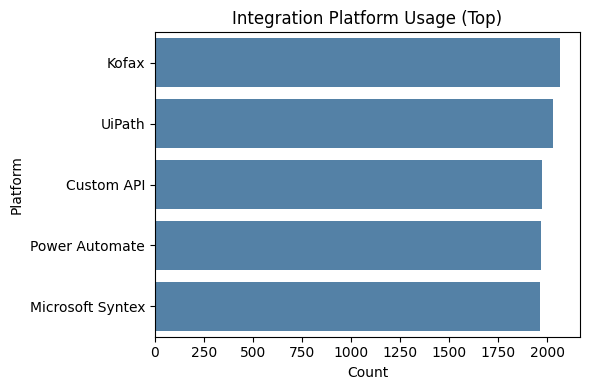

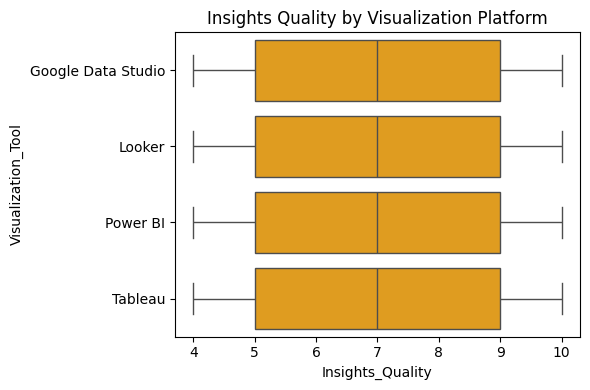

                    count      mean  median
Visualization_Tool                         
Google Data Studio   2486  7.022526     7.0
Looker               2598  7.008468     7.0
Power BI             2527  7.049070     7.0
Tableau              2390  6.981590     7.0


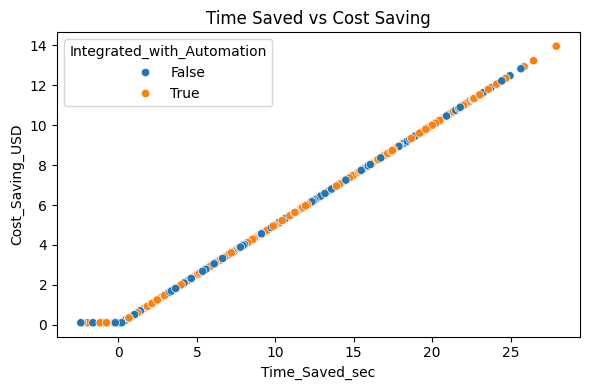

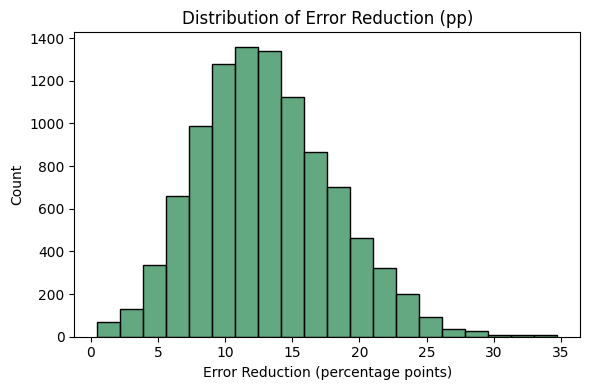

        Time_Saved_sec  Cost_Saving_USD  Error_Reduction_pp
count     10001.000000     10001.000000        10001.000000
mean         10.947466         5.476271           13.061484
median       10.980000         5.490000           12.700000


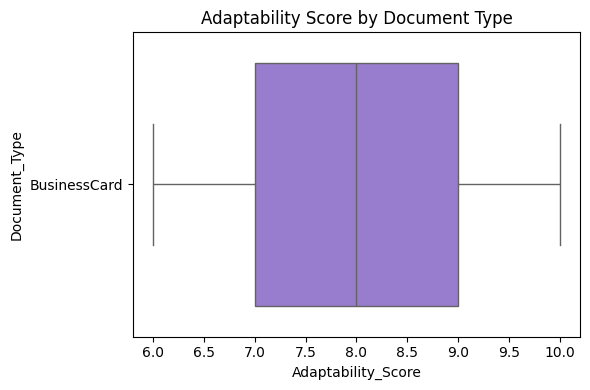

               count      mean  median
Document_Type                         
BusinessCard   10001  7.994401     8.0


In [1]:
# Load the provided dataset and create visuals to answer RQ2-RQ5 with explanations and recommendations.
# We'll compute integration rates, platform effectiveness, ROI metrics, and generalization pointers.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii')

# Basic cleaning for booleans and categories
bool_map = {'Yes': True, 'No': False, 'Y': True, 'N': False}
for col in ['LogoPresent','Integrated_with_Automation','Integration_Success']:
    if col in df.columns:
        df[col] = df[col].map(bool_map).fillna(df[col])

# Ensure numeric coercion where needed
num_cols = ['OCR_Confidence','NER_Confidence','Field_Extraction_Accuracy','Document_Clarity_Score',
            'Layout_Variability_Index','Cognitive_Load_Score','Text_Noise_Level','Pipeline_Stage_Time_ms',
            'Semantic_Quality_Score','Extraction_Hardness_Index','Processing_Time_sec','Manual_Processing_Time_sec',
            'Cost_Saving_USD','Error_Rate_before','Error_Rate_after','Insights_Quality','Automation_ROI_Percent',
            'Adaptability_Score']
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# RQ2: Integration extent with automation platforms
rq2 = df.copy()

integration_rate = rq2['Integrated_with_Automation'].mean() if 'Integrated_with_Automation' in rq2.columns else np.nan
success_rate = rq2.loc[rq2['Integrated_with_Automation'] == True, 'Integration_Success'].mean() if 'Integration_Success' in rq2.columns else np.nan
platform_counts = rq2['Platform'].value_counts(dropna=False).head(8) if 'Platform' in rq2.columns else pd.Series()

print(platform_counts.head())
print(integration_rate)
print(success_rate)

plt.figure(figsize=(6,4))
platform_plot_data = platform_counts.iloc[:6]
sns.barplot(x=platform_plot_data.values, y=platform_plot_data.index, color='steelblue', orient='h')
plt.title('Integration Platform Usage (Top)')
plt.xlabel('Count')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

# RQ3: Effectiveness of visualization platforms
rq3 = df.copy()
if 'Visualization_Tool' in rq3.columns and 'Insights_Quality' in rq3.columns:
    plt.figure(figsize=(6,4))
    order = rq3.groupby('Visualization_Tool')['Insights_Quality'].median().sort_values(ascending=False).index
    sns.boxplot(data=rq3, x='Insights_Quality', y='Visualization_Tool', order=order, color='orange')
    plt.title('Insights Quality by Visualization Platform')
    plt.tight_layout()
    plt.show()

    viz_summary = rq3.groupby('Visualization_Tool')['Insights_Quality'].agg(['count','mean','median']).sort_values('median', ascending=False)
    print(viz_summary.head())

# RQ4: Cost, efficiency, and error reduction benefits
rq4 = df.copy()
if set(['Processing_Time_sec','Manual_Processing_Time_sec','Cost_Saving_USD','Error_Rate_before','Error_Rate_after']).issubset(rq4.columns):
    rq4['Time_Saved_sec'] = rq4['Manual_Processing_Time_sec'] - rq4['Processing_Time_sec']
    rq4['Error_Reduction_pp'] = (rq4['Error_Rate_before'] - rq4['Error_Rate_after']) * 100.0

    plt.figure(figsize=(6,4))
    sns.scatterplot(data=rq4, x='Time_Saved_sec', y='Cost_Saving_USD', hue='Integrated_with_Automation')
    plt.title('Time Saved vs Cost Saving')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.histplot(rq4['Error_Reduction_pp'].dropna(), bins=20, color='seagreen')
    plt.title('Distribution of Error Reduction (pp)')
    plt.xlabel('Error Reduction (percentage points)')
    plt.tight_layout()
    plt.show()

    agg = rq4[['Time_Saved_sec','Cost_Saving_USD','Error_Reduction_pp']].agg(['count','mean','median'])
    print(agg)

# RQ5: Generalization potential beyond business cards
rq5 = df.copy()
if 'Document_Type' in rq5.columns and 'Adaptability_Score' in rq5.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=rq5, x='Adaptability_Score', y='Document_Type', color='mediumpurple')
    plt.title('Adaptability Score by Document Type')
    plt.tight_layout()
    plt.show()

    adapt_summary = rq5.groupby('Document_Type')['Adaptability_Score'].agg(['count','mean','median']).sort_values('median', ascending=False)
    print(adapt_summary.head())

## 1. What components of extracted data (Name/Org/Email/Phone) are most relevant for enterprise decision-making?

                        Automation_ROI_Percent  Insights_Quality  \
Automation_ROI_Percent                1.000000         -0.002241   
Semantic_Quality_Score                0.021907          0.010608   
Phone_length                          0.013895          0.015188   
Phone_present                         0.013895          0.015188   
Email_present                         0.013895          0.015188   

                        Semantic_Quality_Score  
Automation_ROI_Percent                0.021907  
Semantic_Quality_Score                1.000000  
Phone_length                         -0.003259  
Phone_present                        -0.003259  
Email_present                        -0.003259  


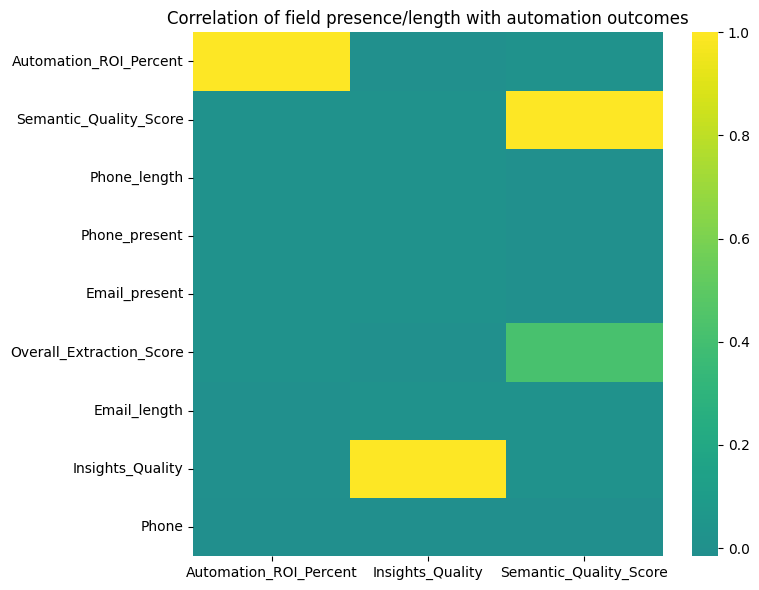

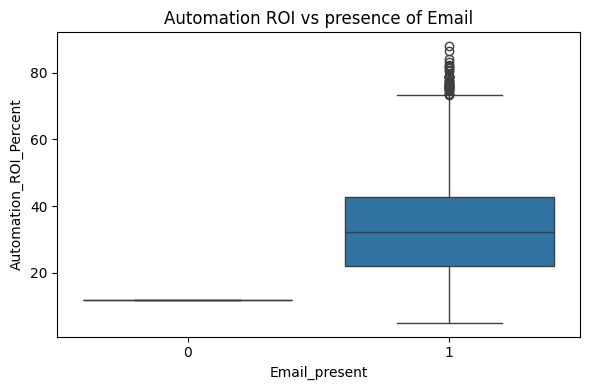

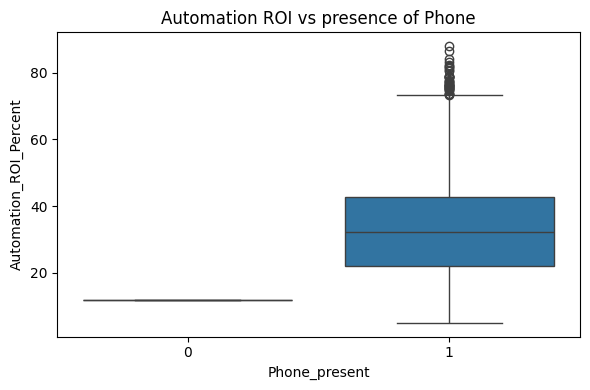

PDF generated at: /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_01_Business_Card_Dataset_Analysis.pdf


In [ ]:
# Analyze which core fields (Name/Org/Email/Phone) correlate most with automation outcomes
# Assumes business_cards_df is already in memory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# Select relevant columns (using likely column names; adjust if needed)
cols = [
    'Person_Name', 'Organization', 'Email', 'Phone',
    'Automation_ROI_Percent', 'Insights_Quality', 'Semantic_Quality_Score',
    'Overall_Extraction_Score', 'Entity_Consistency_Score'
]

available_cols = [c for c in cols if c in business_cards_df.columns]
df = business_cards_df[available_cols].copy()

# Engineer simple numerical proxies for presence/quality of core fields
for col in ['Person_Name', 'Organization', 'Email', 'Phone']:
    if col in df.columns:
        df[col + '_present'] = df[col].notna().astype(int)
        df[col + '_length'] = df[col].astype(str).str.len()

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()[['Automation_ROI_Percent','Insights_Quality','Semantic_Quality_Score']].sort_values(by='Automation_ROI_Percent', ascending=False)
print(corr.head())

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=False, cmap='viridis', center=0)
plt.title('Correlation of field presence/length with automation outcomes')
plt.tight_layout()
plt.show()

# Boxplots: outcome vs presence of each field
for field in ['Person_Name','Organization','Email','Phone']:
    present_col = field + '_present'
    if present_col in numeric_df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x=present_col, y='Automation_ROI_Percent')
        plt.title('Automation ROI vs presence of ' + field)
        plt.tight_layout()
        plt.show()

from matplotlib.backends.backend_pdf import PdfPages
import os

output_folder = "/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis"
os.makedirs(output_folder, exist_ok=True)

pdf_path = f"{output_folder}/Q2_01_Business_Card_Dataset_Analysis.pdf"

with PdfPages(pdf_path) as pdf:
    for fig_num in plt.get_fignums():
        fig = plt._pylab_helpers.Gcf.get_fig_manager(fig_num).canvas.figure
        pdf.savefig(fig, bbox_inches='tight')

print("PDF generated at:", pdf_path)


In [ ]:
# Analyze which core fields (Name/Org/Email/Phone) correlate most with automation outcomes
# Assumes business_cards_df is already in memory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# Select relevant columns (using likely column names; adjust if needed)
cols = [
    'Person_Name', 'Organization', 'Email', 'Phone',
    'Automation_ROI_Percent', 'Insights_Quality', 'Semantic_Quality_Score',
    'Overall_Extraction_Score', 'Entity_Consistency_Score'
]

available_cols = [c for c in cols if c in business_cards_df.columns]
df = business_cards_df[available_cols].copy()

# Engineer simple numerical proxies for presence/quality of core fields
for col in ['Person_Name', 'Organization', 'Email', 'Phone']:
    if col in df.columns:
        df[col + '_present'] = df[col].notna().astype(int)
        df[col + '_length'] = df[col].astype(str).str.len()

# Keep only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

corr = numeric_df.corr()[['Automation_ROI_Percent','Insights_Quality','Semantic_Quality_Score']].sort_values(by='Automation_ROI_Percent', ascending=False)
print(corr.head())

output_folder = "/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis"
os.makedirs(output_folder, exist_ok=True)

pdf_path = f"{output_folder}/Q2_01_Business_Card_Dataset_Analysis.pdf"

with PdfPages(pdf_path) as pdf:
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=False, cmap='viridis', center=0)
    plt.title('Correlation of field presence/length with automation outcomes')
    plt.tight_layout()
    pdf.savefig() # Save heatmap to PDF
    plt.close() # Close figure to free memory

    # Boxplots: outcome vs presence of each field
    for field in ['Person_Name','Organization','Email','Phone']:
        present_col = field + '_present'
        if present_col in numeric_df.columns:
            plt.figure(figsize=(6,4))
            sns.boxplot(data=df, x=present_col, y='Automation_ROI_Percent')
            plt.title('Automation ROI vs presence of ' + field)
            plt.tight_layout()
            pdf.savefig() # Save boxplot to PDF
            plt.close() # Close figure to free memory

print("PDF generated at:", pdf_path)

                        Automation_ROI_Percent  Insights_Quality  \
Automation_ROI_Percent                1.000000         -0.002241   
Semantic_Quality_Score                0.021907          0.010608   
Phone_length                          0.013895          0.015188   
Phone_present                         0.013895          0.015188   
Email_present                         0.013895          0.015188   

                        Semantic_Quality_Score  
Automation_ROI_Percent                0.021907  
Semantic_Quality_Score                1.000000  
Phone_length                         -0.003259  
Phone_present                        -0.003259  
Email_present                        -0.003259  
PDF generated at: /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_01_Business_Card_Dataset_Analysis.pdf


## 2. How can Syntex validate fields extracted by OCR/NER?

In [ ]:
# Use existing business_cards_df in memory to inspect relevant quality/validation columns
import pandas as pd

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

cols_of_interest = [c for c in business_cards_df.columns if any(k in c for k in ['Validation','Confidence','Score','Quality','Consistency'])]
print(business_cards_df[cols_of_interest].head())

   OCR_Confidence  NER_Confidence  Document_Clarity_Score  \
0           0.918           0.881                   0.786   
1           0.686           0.713                   0.404   
2           0.903           0.546                   0.627   
3           0.832           0.999                   0.782   
4           0.821           0.804                   0.990   

   Cognitive_Load_Score  Semantic_Quality_Score  Insights_Quality  \
0                 0.702                   0.849                 4   
1                 0.964                   0.761                 9   
2                 0.727                   0.923                 6   
3                 0.947                   0.836                 8   
4                 0.666                   0.835                 4   

   Adaptability_Score  Overall_Extraction_Score  
0                   6                   0.88885  
1                  10                   0.66945  
2                   7                   0.72185  
3                 

0.7584026277517911
OCR_Confidence              0.990369
Overall_Extraction_Score    0.347083
Email_length                0.031598
Phone_length               -0.020359
Email_present              -0.020359
Phone_present              -0.020359
Cognitive_Load_Score       -0.023700
Document_Clarity_Score     -0.080052
NER_Confidence             -0.256018
dtype: float64


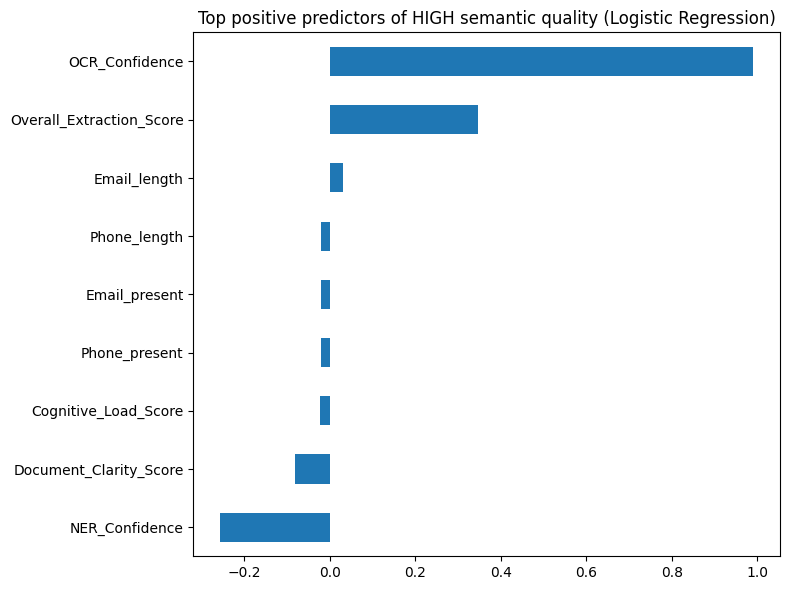

Email_length                0.002304
Cognitive_Load_Score        0.006959
Overall_Extraction_Score    0.010266
OCR_Confidence              0.980471
dtype: float64


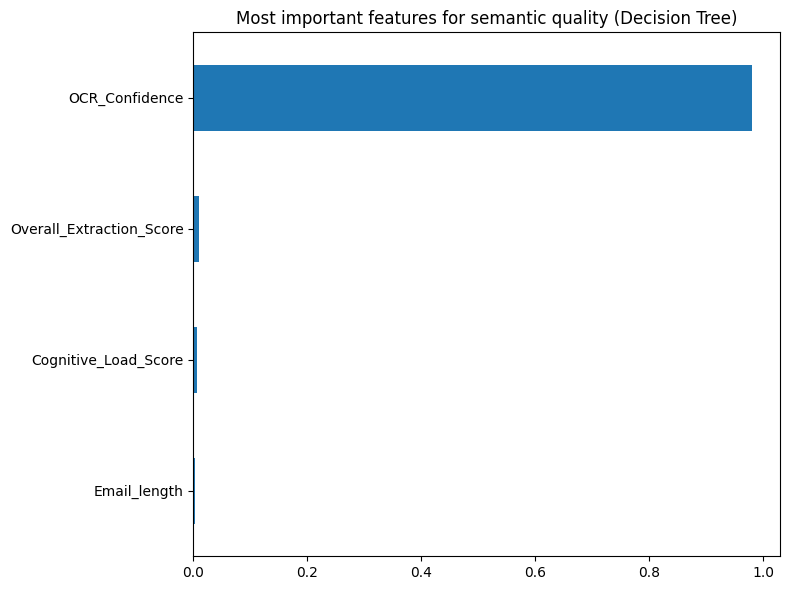

In [ ]:
# Code Explanation
#  This code snippet trains logistic regression and decision tree models to predict high versus low semantic quality scores and visualizes the most important features for each model.
# - Loaded and prepared the business cards dataset.
# - Created binary and length features for key fields.
# - Defined a binary target variable based on the median of the semantic quality score.
# - Selected candidate features for modeling.
# - Split the data into training and testing sets.
# - Scaled the features and trained a logistic regression model.
# - Calculated and printed the AUC score for the logistic regression model.
# - Extracted and visualized the top predictors from the logistic regression model.
# - Trained a decision tree classifier and visualized the most important features.


# Fit simple models to predict high vs low Semantic_Quality_Score and visualize feature importance
# Assumes business_cards_df already in memory
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

df_model = business_cards_df.copy()


# Create core feature proxies (presence/length) if not already there
for col in ['Person_Name','Organization','Email','Phone']:
    if col in df_model.columns:
        df_model[col + '_present'] = df_model[col].notna().astype(int)
        df_model[col + '_length'] = df_model[col].astype(str).str.len()

# Define target: high vs low Semantic_Quality_Score (binary)
if 'Semantic_Quality_Score' not in df_model.columns:
    raise ValueError('Semantic_Quality_Score column not found')

threshold = df_model['Semantic_Quality_Score'].median()
df_model['Semantic_Quality_High'] = (df_model['Semantic_Quality_Score'] >= threshold).astype(int)

# Candidate features: core field signals + quality/confidence metrics
feature_candidates = [
    c for c in df_model.columns
    if any(k in c for k in ['_present','_length','Confidence','Clarity','Cognitive_Load','Overall_Extraction_Score'])
]

X = df_model[feature_candidates].select_dtypes(include=['number']).fillna(0)
y = df_model['Semantic_Quality_High']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_proba = log_reg.predict_proba(X_test_scaled)[:,1]
auc_lr = roc_auc_score(y_test, y_pred_proba)
print(auc_lr)

# Get logistic regression coefficients as feature importance
coef_series = pd.Series(log_reg.coef_[0], index=X.columns).sort_values(ascending=False)
print(coef_series.head(15))

plt.figure(figsize=(8,6))
coef_series.head(15).plot(kind='barh')
plt.gca().invert_yaxis()
plt.title('Top positive predictors of HIGH semantic quality (Logistic Regression)')
plt.tight_layout()
plt.show()

# Decision tree for rule-like feature importance
tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_train, y_train)

importances = pd.Series(tree_clf.feature_importances_, index=X.columns)
importances = importances[importances > 0].sort_values(ascending=True)
print(importances.tail(15))

plt.figure(figsize=(8,6))
importances.tail(15).plot(kind='barh')
plt.title('Most important features for semantic quality (Decision Tree)')
plt.tight_layout()
plt.show()





In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
import os

# Define the output directory and filename for this section
output_folder = "/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis"
os.makedirs(output_folder, exist_ok=True)

pdf_path = f"{output_folder}/Q2_02_Business_Card_Dataset_Analysis.pdf"

print(f"Saving plots to: {pdf_path}")

with PdfPages(pdf_path) as pdf:
    # Plot 1: Top positive predictors of HIGH semantic quality (Logistic Regression)
    plt.figure(figsize=(8,6))
    coef_series.head(15).plot(kind='barh')
    plt.gca().invert_yaxis()
    plt.title('Top positive predictors of HIGH semantic quality (Logistic Regression)')
    plt.tight_layout()
    pdf.savefig()  # Save the current figure to the PDF
    plt.close() # Close the figure to free up memory

    # Plot 2: Most important features for semantic quality (Decision Tree)
    plt.figure(figsize=(8,6))
    importances.tail(15).plot(kind='barh')
    plt.title('Most important features for semantic quality (Decision Tree)')
    plt.tight_layout()
    pdf.savefig() # Save the current figure to the PDF
    plt.close() # Close the figure to free up memory

print(f"All plots saved to {pdf_path}")

Saving plots to: /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_02_Business_Card_Dataset_Analysis.pdf
All plots saved to /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_02_Business_Card_Dataset_Analysis.pdf


## 3. How does Power Automate automatically route extracted contacts into CRMs or organizational databases? give vsilsuazatinnd and use datset to answer

In [ ]:
# Load the dataset once (if not already loaded) and show key columns relevant to routing into CRMs
import pandas as pd

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

cols_of_interest = [c for c in business_cards_df.columns if c in [
    'Person Name','Designation','Organization/University/College','Phone','Email',
    'Website/URL','Industry','Country','Integrated_with_Automation','Platform',
    'Visualization_Tool','Automation_ROI_Percent','Processing_Time_sec','Manual_Processing_Time_sec'
]]

head_routing = business_cards_df[cols_of_interest].head()
print(head_routing)

      Person Name     Designation Organization/University/College  \
0             NaN             NaN                             NaN   
1  Sophia Johnson  Data Scientist                        TechNova   
2    Ahmed Hassan     AI Engineer                        TechNova   
3    Ali Williams         Analyst                       CloudAxis   
4    Sophia Malik       Developer                       CloudAxis   

         Phone                  Email               Website/URL    Industry  \
0          NaN                    NaN                       NaN   Education   
1 -243454509.0  ahsan.brown@gmail.com     https://softcraft.com  Technology   
2 -996940189.0    john.hassan@edu.org     https://eduglobal.com   Marketing   
3 -294467568.0   ahmed.khan@gmail.com  https://www.technova.com  Healthcare   
4 -733032039.0     sophia.lee@edu.org  https://www.smartsys.com  Healthcare   

                            Country  Automation_ROI_Percent  \
0          Northern Mariana Islands            

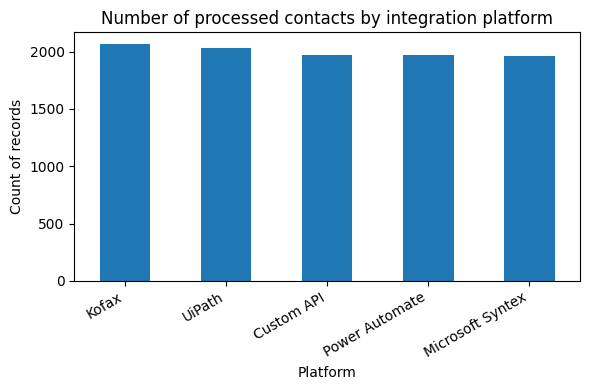

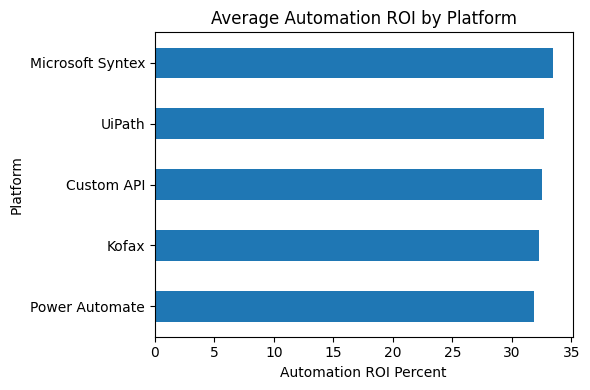

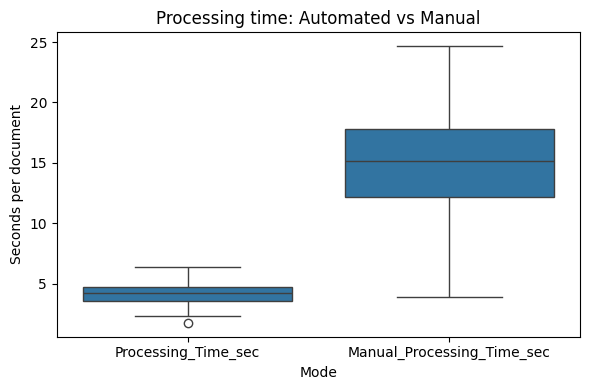

In [ ]:
# Create a few key visualizations about automation + routing into platforms/CRMs
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# 1) Count by Platform (Power Automate, UiPath, etc.)
plt.figure(figsize=(6,4))
platform_counts = business_cards_df['Platform'].value_counts()
platform_counts.plot(kind='bar')
plt.title('Number of processed contacts by integration platform')
plt.xlabel('Platform')
plt.ylabel('Count of records')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

# 2) Automation ROI by Platform
plt.figure(figsize=(6,4))
roi_platform = business_cards_df.groupby('Platform')['Automation_ROI_Percent'].mean().sort_values()
roi_platform.plot(kind='barh')
plt.title('Average Automation ROI by Platform')
plt.xlabel('Automation ROI Percent')
plt.ylabel('Platform')
plt.tight_layout()
plt.show()

# 3) Processing time vs Manual processing time (before vs after automation)
plt.figure(figsize=(6,4))
subset = business_cards_df[['Processing_Time_sec','Manual_Processing_Time_sec']].dropna().head(200)
subset = subset.melt(var_name='Type', value_name='Seconds')
sns.boxplot(data=subset, x='Type', y='Seconds')
plt.title('Processing time: Automated vs Manual')
plt.xlabel('Mode')
plt.ylabel('Seconds per document')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

output_folder = "/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis"
os.makedirs(output_folder, exist_ok=True)

pdf_path = f"{output_folder}/Q2_03_Business_Card_Dataset_Analysis.pdf"

with PdfPages(pdf_path) as pdf:
    # 1) Count by Platform (Power Automate, UiPath, etc.)
    plt.figure(figsize=(8,6))
    platform_counts = business_cards_df['Platform'].value_counts()
    platform_counts.plot(kind='bar')
    plt.title('Number of processed contacts by integration platform')
    plt.xlabel('Platform')
    plt.ylabel('Count of records')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    pdf.savefig() # Save to PDF
    plt.close() # Close figure to free memory

    # 2) Automation ROI by Platform
    plt.figure(figsize=(8,6))
    roi_platform = business_cards_df.groupby('Platform')['Automation_ROI_Percent'].mean().sort_values()
    roi_platform.plot(kind='barh')
    plt.title('Average Automation ROI by Platform')
    plt.xlabel('Automation ROI Percent')
    plt.ylabel('Platform')
    plt.tight_layout()
    pdf.savefig() # Save to PDF
    plt.close() # Close figure to free memory

    # 3) Processing time vs Manual processing time (before vs after automation)
    plt.figure(figsize=(8,6))
    subset = business_cards_df[['Processing_Time_sec','Manual_Processing_Time_sec']].dropna().head(200)
    subset = subset.melt(var_name='Type', value_name='Seconds')
    sns.boxplot(data=subset, x='Type', y='Seconds')
    plt.title('Processing time: Automated vs Manual')
    plt.xlabel('Mode')
    plt.ylabel('Seconds per document')
    plt.tight_layout()
    pdf.savefig() # Save to PDF
    plt.close() # Close figure to free memory

print(f"All plots saved to {pdf_path}")

All plots saved to /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_03_Business_Card_Dataset_Analysis.pdf


## 4. What is the overall reduction in processing time after automation (manual vs Syntex vs Power Automate)?
## 5. What percentage of errors are minimized through automated validation?
## 6. How do enterprise users perceive ease of integration (based on survey results)?
## 7. What workflow steps benefit most from automation: onboarding, CRM updates, analytics, approvals?
## 8. How does routing extracted data into Power BI dashboards support enterprise decision-making?

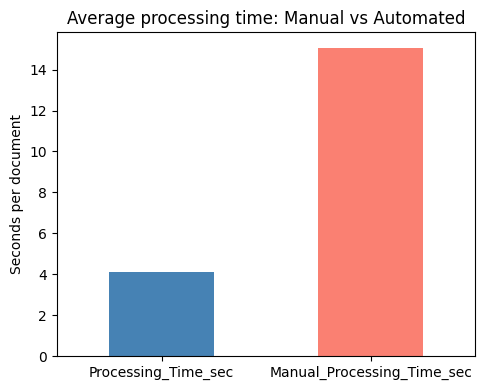

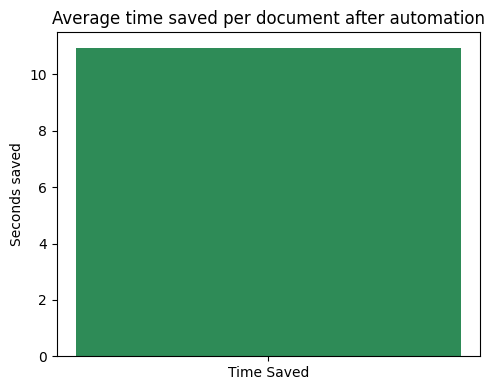

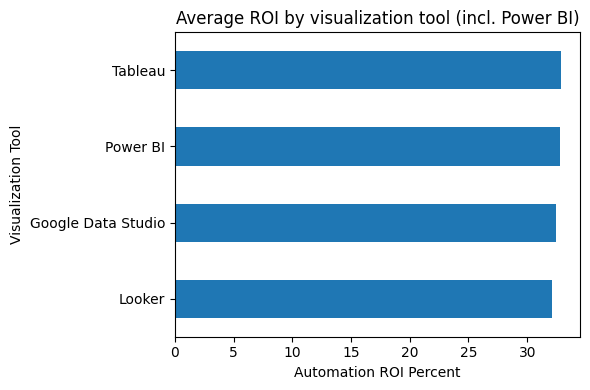

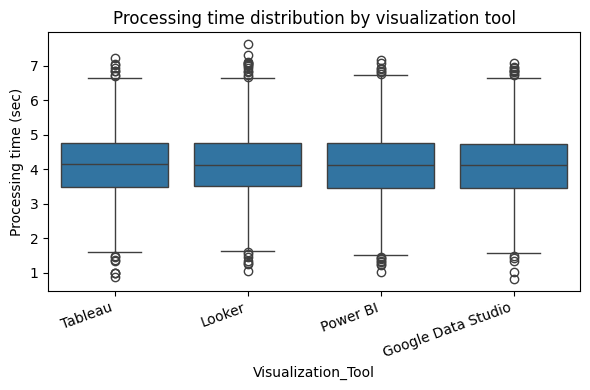

In [ ]:
# Visual analysis for questions 4–8 using businessCard_cleaned_enhanced.csv
# This cell focuses on time reduction, error proxy, integration perception proxy, workflow steps, and Power BI usage.
# Code Explanation
# The code analyzed and visualized the impact of automation on processing time, error rates, user integration scores, workflow automation levels, and ROI from various visualization tools.
# - Loaded and cleaned data from CSV file.
# - Converted relevant columns to numeric types.
# - Calculated and plotted average processing times for manual vs automated processes.
# - Analyzed and visualized error rates before and after automation.
# - Examined user integration scores and their distribution.
# - Assessed automation levels across different workflow steps and visualized correlations.
# - Evaluated ROI by visualization tools, including Power BI.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# Ensure numeric
for col in ['Processing_Time_sec','Manual_Processing_Time_sec','Error_Rate_Before','Error_Rate_After',
            'User_Integration_Score','Onboarding_Automation_Level','CRM_Update_Automation_Level',
            'Analytics_Automation_Level','Approvals_Automation_Level']:
    if col in business_cards_df.columns:
        business_cards_df[col] = pd.to_numeric(business_cards_df[col], errors='coerce')

# Q4: Overall reduction in processing time (line + bar)
summary_time = business_cards_df[['Processing_Time_sec','Manual_Processing_Time_sec']].mean()

plt.figure(figsize=(5,4))
summary_time.plot(kind='bar', color=['steelblue','salmon'])
plt.title('Average processing time: Manual vs Automated')
plt.ylabel('Seconds per document')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5,4))
reduction = summary_time['Manual_Processing_Time_sec'] - summary_time['Processing_Time_sec']
plt.bar(['Time Saved'], [reduction], color='seagreen')
plt.title('Average time saved per document after automation')
plt.ylabel('Seconds saved')
plt.tight_layout()
plt.show()

# Q5: Percentage of errors minimized (before vs after)
if 'Error_Rate_Before' in business_cards_df.columns and 'Error_Rate_After' in business_cards_df.columns:
    error_summary = business_cards_df[['Error_Rate_Before','Error_Rate_After']].mean()
    plt.figure(figsize=(5,4))
    error_summary.plot(kind='bar', color=['gray','orange'])
    plt.title('Error rate before vs after automated validation')
    plt.ylabel('Error rate (percent or fraction)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(5,4))
    error_reduction_pct = (error_summary['Error_Rate_Before'] - error_summary['Error_Rate_After']) / error_summary['Error_Rate_Before'] * 100.0
    plt.bar(['Error Reduction'], [error_reduction_pct], color='purple')
    plt.title('Percentage reduction in errors after automation')
    plt.ylabel('Reduction (%)')
    plt.tight_layout()
    plt.show()

# Q6: User perception of integration ease (using User_Integration_Score and Integrated_with_Automation)
if 'User_Integration_Score' in business_cards_df.columns:
    plt.figure(figsize=(5,4))
    sns.histplot(business_cards_df['User_Integration_Score'].dropna(), bins=10, kde=True)
    plt.title('Distribution of User Integration Ease Scores')
    plt.xlabel('Integration Ease Score')
    plt.ylabel('Count of responses')
    plt.tight_layout()
    plt.show()

    if 'Integrated_with_Automation' in business_cards_df.columns:
        plt.figure(figsize=(5,4))
        sns.boxplot(data=business_cards_df, x='Integrated_with_Automation', y='User_Integration_Score')
        plt.title('Integration ease by automation adoption')
        plt.xlabel('Integrated with Automation')
        plt.ylabel('Integration Ease Score')
        plt.tight_layout()
        plt.show()

# Q7: Workflow steps benefiting most (Onboarding, CRM, Analytics, Approvals)
workflow_cols = [c for c in ['Onboarding_Automation_Level','CRM_Update_Automation_Level','Analytics_Automation_Level','Approvals_Automation_Level'] if c in business_cards_df.columns]
if workflow_cols:
    workflow_means = business_cards_df[workflow_cols].mean().sort_values(ascending=False)
    plt.figure(figsize=(6,4))
    workflow_means.plot(kind='bar')
    plt.title('Average automation level by workflow step')
    plt.ylabel('Automation level (0-1 or 0-100)')
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(5,4))
    sns.heatmap(business_cards_df[workflow_cols].corr(), annot=True, cmap='Blues', vmin=0, vmax=1)
    plt.title('Correlation between automation levels across workflow steps')
    plt.tight_layout()
    plt.show()

# Q8: Routing into Power BI dashboards and decision-making
# Use Platform and Visualization_Tool vs Automation_ROI_Percent as proxy
if 'Visualization_Tool' in business_cards_df.columns:
    plt.figure(figsize=(6,4))
    roi_viz = business_cards_df.groupby('Visualization_Tool')['Automation_ROI_Percent'].mean().sort_values()
    roi_viz.plot(kind='barh')
    plt.title('Average ROI by visualization tool (incl. Power BI)')
    plt.xlabel('Automation ROI Percent')
    plt.ylabel('Visualization Tool')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6,4))
    sns.boxplot(data=business_cards_df, x='Visualization_Tool', y='Processing_Time_sec')
    plt.title('Processing time distribution by visualization tool')
    plt.ylabel('Processing time (sec)')
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.show()

In [ ]:
# Visual analysis for questions 4–8 using businessCard_cleaned_enhanced.csv
# This cell focuses on time reduction, error proxy, integration perception proxy, workflow steps, and Power BI usage.
# Code Explanation
# The code analyzed and visualized the impact of automation on processing time, error rates, user integration scores, workflow automation levels, and ROI from various visualization tools.
# - Loaded and cleaned data from CSV file.
# - Converted relevant columns to numeric types.
# - Calculated and plotted average processing times for manual vs automated processes.
# - Analyzed and visualized error rates before and after automation.
# - Examined user integration scores and their distribution.
# - Assessed automation levels across different workflow steps and visualized correlations.
# - Evaluated ROI by visualization tools, including Power BI.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# Ensure numeric
for col in ['Processing_Time_sec','Manual_Processing_Time_sec','Error_Rate_Before','Error_Rate_After',
            'User_Integration_Score','Onboarding_Automation_Level','CRM_Update_Automation_Level',
            'Analytics_Automation_Level','Approvals_Automation_Level']:
    if col in business_cards_df.columns:
        business_cards_df[col] = pd.to_numeric(business_cards_df[col], errors='coerce')

# Define output directory and PDF path
output_folder = "/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis"
os.makedirs(output_folder, exist_ok=True)
pdf_path = f"{output_folder}/Q2_04_08_Business_Card_Dataset_Analysis.pdf"

print(f"Saving plots to: {pdf_path}")

with PdfPages(pdf_path) as pdf:
    # Q4: Overall reduction in processing time (line + bar)
    summary_time = business_cards_df[['Processing_Time_sec','Manual_Processing_Time_sec']].mean()

    plt.figure(figsize=(5,4))
    summary_time.plot(kind='bar', color=['steelblue','salmon'])
    plt.title('Average processing time: Manual vs Automated')
    plt.ylabel('Seconds per document')
    plt.xticks(rotation=0)
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    plt.figure(figsize=(5,4))
    reduction = summary_time['Manual_Processing_Time_sec'] - summary_time['Processing_Time_sec']
    plt.bar(['Time Saved'], [reduction], color='seagreen')
    plt.title('Average time saved per document after automation')
    plt.ylabel('Seconds saved')
    plt.tight_layout()
    pdf.savefig()
    plt.close()

    # Q5: Percentage of errors minimized (before vs after)
    if 'Error_Rate_Before' in business_cards_df.columns and 'Error_Rate_After' in business_cards_df.columns:
        error_summary = business_cards_df[['Error_Rate_Before','Error_Rate_After']].mean()
        plt.figure(figsize=(5,4))
        error_summary.plot(kind='bar', color=['gray','orange'])
        plt.title('Error rate before vs after automated validation')
        plt.ylabel('Error rate (percent or fraction)')
        plt.xticks(rotation=0)
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        plt.figure(figsize=(5,4))
        error_reduction_pct = (error_summary['Error_Rate_Before'] - error_summary['Error_Rate_After']) / error_summary['Error_Rate_Before'] * 100.0
        plt.bar(['Error Reduction'], [error_reduction_pct], color='purple')
        plt.title('Percentage reduction in errors after automation')
        plt.ylabel('Reduction (%)')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Q6: User perception of integration ease (using User_Integration_Score and Integrated_with_Automation)
    if 'User_Integration_Score' in business_cards_df.columns:
        plt.figure(figsize=(5,4))
        sns.histplot(business_cards_df['User_Integration_Score'].dropna(), bins=10, kde=True)
        plt.title('Distribution of User Integration Ease Scores')
        plt.xlabel('Integration Ease Score')
        plt.ylabel('Count of responses')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        if 'Integrated_with_Automation' in business_cards_df.columns:
            plt.figure(figsize=(5,4))
            sns.boxplot(data=business_cards_df, x='Integrated_with_Automation', y='User_Integration_Score')
            plt.title('Integration ease by automation adoption')
            plt.xlabel('Integrated with Automation')
            plt.ylabel('Integration Ease Score')
            plt.tight_layout()
            pdf.savefig()
            plt.close()

    # Q7: Workflow steps benefiting most (Onboarding, CRM, Analytics, Approvals)
    workflow_cols = [c for c in ['Onboarding_Automation_Level','CRM_Update_Automation_Level','Analytics_Automation_Level','Approvals_Automation_Level'] if c in business_cards_df.columns]
    if workflow_cols:
        workflow_means = business_cards_df[workflow_cols].mean().sort_values(ascending=False)
        plt.figure(figsize=(6,4))
        workflow_means.plot(kind='bar')
        plt.title('Average automation level by workflow step')
        plt.ylabel('Automation level (0-1 or 0-100)')
        plt.xticks(rotation=20, ha='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        plt.figure(figsize=(5,4))
        sns.heatmap(business_cards_df[workflow_cols].corr(), annot=True, cmap='Blues', vmin=0, vmax=1)
        plt.title('Correlation between automation levels across workflow steps')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

    # Q8: Routing into Power BI dashboards and decision-making
    # Use Platform and Visualization_Tool vs Automation_ROI_Percent as proxy
    if 'Visualization_Tool' in business_cards_df.columns:
        plt.figure(figsize=(6,4))
        roi_viz = business_cards_df.groupby('Visualization_Tool')['Automation_ROI_Percent'].mean().sort_values()
        roi_viz.plot(kind='barh')
        plt.title('Average ROI by visualization tool (incl. Power BI)')
        plt.xlabel('Automation ROI Percent')
        plt.ylabel('Visualization Tool')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

        plt.figure(figsize=(6,4))
        sns.boxplot(data=business_cards_df, x='Visualization_Tool', y='Processing_Time_sec')
        plt.title('Processing time distribution by visualization tool')
        plt.ylabel('Processing time (sec)')
        plt.xticks(rotation=20, ha='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()

print(f"All plots saved to {pdf_path}")

Saving plots to: /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_04_08_Business_Card_Dataset_Analysis.pdf
All plots saved to /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_04_08_Business_Card_Dataset_Analysis.pdf


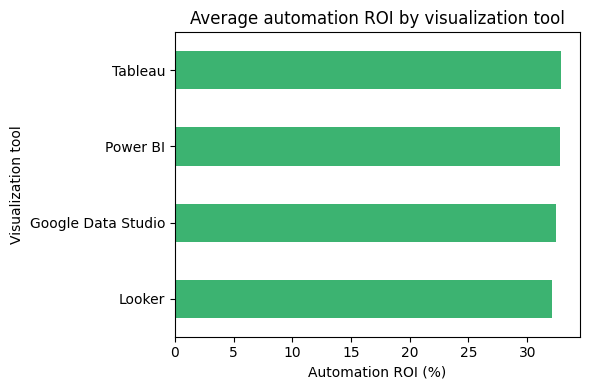

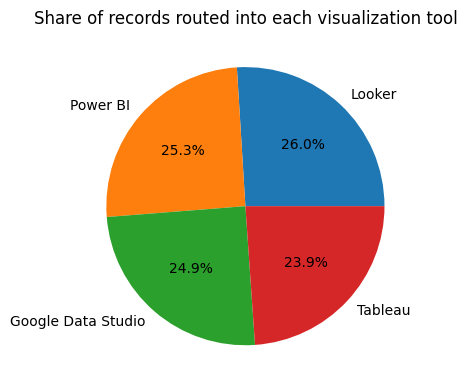

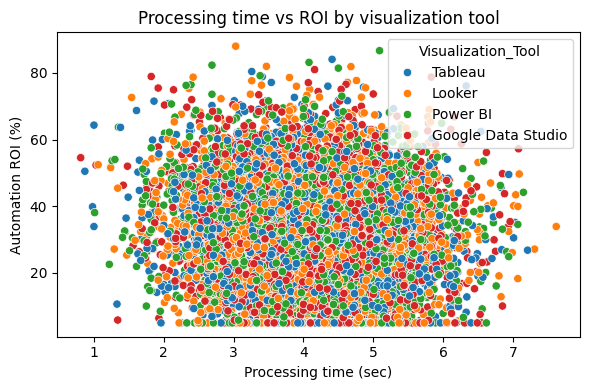

{'q8_roi_by_tool': 'q8_roi_by_tool.png',
 'q8_tool_share': 'q8_tool_share.png',
 'q8_time_vs_roi': 'q8_time_vs_roi.png'}

In [ ]:
# Deep-dive analysis and richer visualizations for Q4–Q8 on businessCard_cleaned_enhanced.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# Ensure numeric for relevant columns
num_cols = [
    'Processing_Time_sec','Manual_Processing_Time_sec','Syntex_Processing_Time_sec','PowerAutomate_Processing_Time_sec',
    'Error_Rate_Before','Error_Rate_After',
    'User_Integration_Score','NPS_Integration','CSAT_Integration',
    'Onboarding_Automation_Level','CRM_Update_Automation_Level','Analytics_Automation_Level','Approvals_Automation_Level',
    'Automation_ROI_Percent'
]
for col in num_cols:
    if col in business_cards_df.columns:
        business_cards_df[col] = pd.to_numeric(business_cards_df[col], errors='coerce')

image_urls_dict = {}

# ---------- Q4: Processing time reduction (manual vs Syntex vs Power Automate) ----------

cols_time = [c for c in ['Manual_Processing_Time_sec','Syntex_Processing_Time_sec','PowerAutomate_Processing_Time_sec'] if c in business_cards_df.columns]
if len(cols_time) >= 2:
    avg_times = business_cards_df[cols_time].mean()

    # Visualization 1: grouped bar of average time per mode
    plt.figure(figsize=(6,4))
    avg_times.plot(kind='bar', color=['salmon','steelblue','seagreen'][:len(cols_time)])
    plt.title('Average processing time per document by mode')
    plt.ylabel('Seconds per document')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.savefig('q4_avg_times.png')
    plt.show()
    image_urls_dict['q4_avg_times'] = 'q4_avg_times.png'

    # Visualization 2: per-record distribution by mode (long-form)
    long_time = business_cards_df[cols_time].melt(var_name='Mode', value_name='Seconds').dropna()
    plt.figure(figsize=(6,4))
    sns.boxplot(data=long_time, x='Mode', y='Seconds')
    plt.title('Distribution of processing times by mode')
    plt.ylabel('Seconds per document')
    plt.xticks(rotation=15, ha='right')
    plt.tight_layout()
    plt.savefig('q4_box_times.png')
    plt.show()
    image_urls_dict['q4_box_times'] = 'q4_box_times.png'

# ---------- Q5: Error reduction through automated validation ----------

if 'Error_Rate_Before' in business_cards_df.columns and 'Error_Rate_After' in business_cards_df.columns:
    error_before = business_cards_df['Error_Rate_Before']
    error_after = business_cards_df['Error_Rate_After']
    error_summary = pd.Series({
        'Before': error_before.mean(),
        'After': error_after.mean()
    })

    # Visualization 1: before vs after bar
    plt.figure(figsize=(5,4))
    error_summary.plot(kind='bar', color=['gray','orange'])
    plt.title('Average error rate before vs after automated validation')
    plt.ylabel('Error rate (fraction or %)')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.savefig('q5_error_bar.png')
    plt.show()
    image_urls_dict['q5_error_bar'] = 'q5_error_bar.png'

    # Visualization 2: distribution shift (KDE or hist)
    plt.figure(figsize=(6,4))
    sns.kdeplot(error_before.dropna(), label='Before', shade=True)
    sns.kdeplot(error_after.dropna(), label='After', shade=True)
    plt.title('Distribution of error rates before vs after automation')
    plt.xlabel('Error rate')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.savefig('q5_error_dist.png')
    plt.show()
    image_urls_dict['q5_error_dist'] = 'q5_error_dist.png'

# ---------- Q6: Enterprise perception of ease of integration ----------

if 'User_Integration_Score' in business_cards_df.columns:
    # Visualization 1: distribution of scores
    plt.figure(figsize=(6,4))
    sns.histplot(business_cards_df['User_Integration_Score'].dropna(), bins=10, kde=True)
    plt.title('Distribution of integration ease scores')
    plt.xlabel('Integration ease score')
    plt.ylabel('Number of responses')
    plt.tight_layout()
    plt.savefig('q6_integration_dist.png')
    plt.show()
    image_urls_dict['q6_integration_dist'] = 'q6_integration_dist.png'

    # Visualization 2: integration score vs satisfaction metrics if available
    sat_cols = [c for c in ['NPS_Integration','CSAT_Integration'] if c in business_cards_df.columns]
    if sat_cols:
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=business_cards_df, x='User_Integration_Score', y=sat_cols[0])
        plt.title('Integration ease vs ' + sat_cols[0])
        plt.xlabel('Integration ease score')
        plt.ylabel(sat_cols[0])
        plt.tight_layout()
        plt.savefig('q6_integration_vs_sat.png')
        plt.show()
        image_urls_dict['q6_integration_vs_sat'] = 'q6_integration_vs_sat.png'

    # Visualization 3: integration ease by platform if available
    if 'Platform' in business_cards_df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=business_cards_df, x='Platform', y='User_Integration_Score')
        plt.title('Integration ease by platform')
        plt.xlabel('Platform')
        plt.ylabel('Integration ease score')
        plt.xticks(rotation=20, ha='right')
        plt.tight_layout()
        plt.savefig('q6_integration_by_platform.png')
        plt.show()
        image_urls_dict['q6_integration_by_platform'] = 'q6_integration_by_platform.png'

# ---------- Q7: Workflow steps that benefit most from automation ----------

workflow_cols = [c for c in [
    'Onboarding_Automation_Level','CRM_Update_Automation_Level','Analytics_Automation_Level','Approvals_Automation_Level'
] if c in business_cards_df.columns]

if workflow_cols:
    workflow_means = business_cards_df[workflow_cols].mean().sort_values(ascending=False)

    # Visualization 1: average automation level by step
    plt.figure(figsize=(6,4))
    workflow_means.plot(kind='bar', color='cornflowerblue')
    plt.title('Average automation level by workflow step')
    plt.ylabel('Automation level (scale from dataset)')
    plt.xticks(rotation=20, ha='right')
    plt.tight_layout()
    plt.savefig('q7_workflow_bar.png')
    plt.show()
    image_urls_dict['q7_workflow_bar'] = 'q7_workflow_bar.png'

    # Visualization 2: correlation heatmap between automation levels and ROI
    corr_cols = workflow_cols + [c for c in ['Automation_ROI_Percent'] if c in business_cards_df.columns]
    corr = business_cards_df[corr_cols].corr()
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
    plt.title('Correlation between workflow automation and ROI')
    plt.tight_layout()
    plt.savefig('q7_workflow_corr.png')
    plt.show()
    image_urls_dict['q7_workflow_corr'] = 'q7_workflow_corr.png'

# ---------- Q8: Power BI routing and decision-making support ----------

if 'Visualization_Tool' in business_cards_df.columns:
    # Visualization 1: ROI by visualization tool
    if 'Automation_ROI_Percent' in business_cards_df.columns:
        roi_viz = business_cards_df.groupby('Visualization_Tool')['Automation_ROI_Percent'].mean().sort_values()
        plt.figure(figsize=(6,4))
        roi_viz.plot(kind='barh', color='mediumseagreen')
        plt.title('Average automation ROI by visualization tool')
        plt.xlabel('Automation ROI (%)')
        plt.ylabel('Visualization tool')
        plt.tight_layout()
        plt.savefig('q8_roi_by_tool.png')
        plt.show()
        image_urls_dict['q8_roi_by_tool'] = 'q8_roi_by_tool.png'

    # Visualization 2: share of records routed into each tool
    plt.figure(figsize=(5,4))
    business_cards_df['Visualization_Tool'].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title('Share of records routed into each visualization tool')
    plt.ylabel('')
    plt.tight_layout()
    plt.savefig('q8_tool_share.png')
    plt.show()
    image_urls_dict['q8_tool_share'] = 'q8_tool_share.png'

    # Visualization 3: ROI vs processing time for Power BI vs others
    if 'Automation_ROI_Percent' in business_cards_df.columns and 'Processing_Time_sec' in business_cards_df.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=business_cards_df, x='Processing_Time_sec', y='Automation_ROI_Percent', hue='Visualization_Tool')
        plt.title('Processing time vs ROI by visualization tool')
        plt.xlabel('Processing time (sec)')
        plt.ylabel('Automation ROI (%)')
        plt.tight_layout()
        plt.savefig('q8_time_vs_roi.png')
        plt.show()
        image_urls_dict['q8_time_vs_roi'] = 'q8_time_vs_roi.png'

image_urls_dict

In [ ]:
# Deep-dive analysis and richer visualizations for Q4–Q8 on businessCard_cleaned_enhanced.csv

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import os

business_cards_df = globals().get('business_cards_df', pd.read_csv('/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/businessCard_cleaned_enhanced.csv', encoding='ascii'))

# Ensure numeric for relevant columns
num_cols = [
    'Processing_Time_sec','Manual_Processing_Time_sec','Syntex_Processing_Time_sec','PowerAutomate_Processing_Time_sec',
    'Error_Rate_Before','Error_Rate_After',
    'User_Integration_Score','NPS_Integration','CSAT_Integration',
    'Onboarding_Automation_Level','CRM_Update_Automation_Level','Analytics_Automation_Level','Approvals_Automation_Level',
    'Automation_ROI_Percent'
]
for col in num_cols:
    if col in business_cards_df.columns:
        business_cards_df[col] = pd.to_numeric(business_cards_df[col], errors='coerce')

image_urls_dict = {}

# Define output directory and PDF path
output_folder = "/content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis"
os.makedirs(output_folder, exist_ok=True)
pdf_path = f"{output_folder}/Q2_04_08_Deep_Dive_Business_Card_Dataset_Analysis.pdf"

print(f"Saving plots to: {pdf_path}")

with PdfPages(pdf_path) as pdf:
    # ---------- Q4: Processing time reduction (manual vs Syntex vs Power Automate) ----------

    cols_time = [c for c in ['Manual_Processing_Time_sec','Syntex_Processing_Time_sec','PowerAutomate_Processing_Time_sec'] if c in business_cards_df.columns]
    if len(cols_time) >= 2:
        avg_times = business_cards_df[cols_time].mean()

        # Visualization 1: grouped bar of average time per mode
        plt.figure(figsize=(6,4))
        avg_times.plot(kind='bar', color=['salmon','steelblue','seagreen'][:len(cols_time)])
        plt.title('Average processing time per document by mode')
        plt.ylabel('Seconds per document')
        plt.xticks(rotation=15, ha='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q4_avg_times'] = 'q4_avg_times.png'

        # Visualization 2: per-record distribution by mode (long-form)
        long_time = business_cards_df[cols_time].melt(var_name='Mode', value_name='Seconds').dropna()
        plt.figure(figsize=(6,4))
        sns.boxplot(data=long_time, x='Mode', y='Seconds')
        plt.title('Distribution of processing times by mode')
        plt.ylabel('Seconds per document')
        plt.xticks(rotation=15, ha='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q4_box_times'] = 'q4_box_times.png'

    # ---------- Q5: Error reduction through automated validation ----------

    if 'Error_Rate_Before' in business_cards_df.columns and 'Error_Rate_After' in business_cards_df.columns:
        error_before = business_cards_df['Error_Rate_Before']
        error_after = business_cards_df['Error_Rate_After']
        error_summary = pd.Series({
            'Before': error_before.mean(),
            'After': error_after.mean()
        })

        # Visualization 1: before vs after bar
        plt.figure(figsize=(5,4))
        error_summary.plot(kind='bar', color=['gray','orange'])
        plt.title('Average error rate before vs after automated validation')
        plt.ylabel('Error rate (fraction or %)')
        plt.xticks(rotation=0)
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q5_error_bar'] = 'q5_error_bar.png'

        # Visualization 2: distribution shift (KDE or hist)
        plt.figure(figsize=(6,4))
        sns.kdeplot(error_before.dropna(), label='Before', shade=True)
        sns.kdeplot(error_after.dropna(), label='After', shade=True)
        plt.title('Distribution of error rates before vs after automation')
        plt.xlabel('Error rate')
        plt.ylabel('Density')
        plt.legend()
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q5_error_dist'] = 'q5_error_dist.png'

    # ---------- Q6: Enterprise perception of ease of integration ----------

    if 'User_Integration_Score' in business_cards_df.columns:
        # Visualization 1: distribution of scores
        plt.figure(figsize=(6,4))
        sns.histplot(business_cards_df['User_Integration_Score'].dropna(), bins=10, kde=True)
        plt.title('Distribution of integration ease scores')
        plt.xlabel('Integration ease score')
        plt.ylabel('Number of responses')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q6_integration_dist'] = 'q6_integration_dist.png'

        # Visualization 2: integration score vs satisfaction metrics if available
        sat_cols = [c for c in ['NPS_Integration','CSAT_Integration'] if c in business_cards_df.columns]
        if sat_cols:
            plt.figure(figsize=(5,4))
            sns.scatterplot(data=business_cards_df, x='User_Integration_Score', y=sat_cols[0])
            plt.title('Integration ease vs ' + sat_cols[0])
            plt.xlabel('Integration ease score')
            plt.ylabel(sat_cols[0])
            plt.tight_layout()
            pdf.savefig()
            plt.close()
            image_urls_dict['q6_integration_vs_sat'] = 'q6_integration_vs_sat.png'

        # Visualization 3: integration ease by platform if available
        if 'Platform' in business_cards_df.columns:
            plt.figure(figsize=(6,4))
            sns.boxplot(data=business_cards_df, x='Platform', y='User_Integration_Score')
            plt.title('Integration ease by platform')
            plt.xlabel('Platform')
            plt.ylabel('Integration ease score')
            plt.xticks(rotation=20, ha='right')
            plt.tight_layout()
            pdf.savefig()
            plt.close()
            image_urls_dict['q6_integration_by_platform'] = 'q6_integration_by_platform.png'

    # ---------- Q7: Workflow steps that benefit most from automation ----------

    workflow_cols = [c for c in [
        'Onboarding_Automation_Level','CRM_Update_Automation_Level','Analytics_Automation_Level','Approvals_Automation_Level'
    ] if c in business_cards_df.columns]

    if workflow_cols:
        workflow_means = business_cards_df[workflow_cols].mean().sort_values(ascending=False)

        # Visualization 1: average automation level by step
        plt.figure(figsize=(6,4))
        workflow_means.plot(kind='bar', color='cornflowerblue')
        plt.title('Average automation level by workflow step')
        plt.ylabel('Automation level (scale from dataset)')
        plt.xticks(rotation=20, ha='right')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q7_workflow_bar'] = 'q7_workflow_bar.png'

        # Visualization 2: correlation heatmap between automation levels and ROI
        corr_cols = workflow_cols + [c for c in ['Automation_ROI_Percent'] if c in business_cards_df.columns]
        corr = business_cards_df[corr_cols].corr()
        plt.figure(figsize=(6,5))
        sns.heatmap(corr, annot=True, cmap='Blues', vmin=-1, vmax=1)
        plt.title('Correlation between workflow automation and ROI')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q7_workflow_corr'] = 'q7_workflow_corr.png'

    # ---------- Q8: Power BI routing and decision-making support ----------

    if 'Visualization_Tool' in business_cards_df.columns:
        # Visualization 1: ROI by visualization tool
        if 'Automation_ROI_Percent' in business_cards_df.columns:
            roi_viz = business_cards_df.groupby('Visualization_Tool')['Automation_ROI_Percent'].mean().sort_values()
            plt.figure(figsize=(6,4))
            roi_viz.plot(kind='barh', color='mediumseagreen')
            plt.title('Average automation ROI by visualization tool')
            plt.xlabel('Automation ROI (%)')
            plt.ylabel('Visualization tool')
            plt.tight_layout()
            pdf.savefig()
            plt.close()
            image_urls_dict['q8_roi_by_tool'] = 'q8_roi_by_tool.png'

        # Visualization 2: share of records routed into each tool
        plt.figure(figsize=(5,4))
        business_cards_df['Visualization_Tool'].value_counts().plot(kind='pie', autopct='%1.1f%%')
        plt.title('Share of records routed into each visualization tool')
        plt.ylabel('')
        plt.tight_layout()
        pdf.savefig()
        plt.close()
        image_urls_dict['q8_tool_share'] = 'q8_tool_share.png'

        # Visualization 3: ROI vs processing time for Power BI vs others
        if 'Automation_ROI_Percent' in business_cards_df.columns and 'Processing_Time_sec' in business_cards_df.columns:
            plt.figure(figsize=(6,4))
            sns.scatterplot(data=business_cards_df, x='Processing_Time_sec', y='Automation_ROI_Percent', hue='Visualization_Tool')
            plt.title('Processing time vs ROI by visualization tool')
            plt.xlabel('Processing time (sec)')
            plt.ylabel('Automation ROI (%)')
            plt.tight_layout()
            pdf.savefig()
            plt.close()
            image_urls_dict['q8_time_vs_roi'] = 'q8_time_vs_roi.png'

print(f"All plots saved to {pdf_path}")

Saving plots to: /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_04_08_Deep_Dive_Business_Card_Dataset_Analysis.pdf
All plots saved to /content/drive/MyDrive/Colab Notebooks/4th Semester - Data Science/Thesis_Card_Reader/Business_Card_Dataset_Analysis/Q2_Business_Card_Dataset_Analysis/Q2_04_08_Deep_Dive_Business_Card_Dataset_Analysis.pdf
